<a href="https://colab.research.google.com/github/PriscillaMuli/Digitization-Handwritten-Digit-Recognition-Python-Project/blob/main/Digitization_Handwritten_Digit_Recognition_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Project Objective**



**1.1 Defining the Question**

The objective of the project is the creation of data science models which can recognize handwritten digits. The programming language used for this project is Python programming language. Digit recognition is one of the advancements the field of data science has enabled people to utilize and benefit.

**1.2 Defining the Metric for Success**

Metric of success for this project is to create two comparative models that are effective, accurate and useful in the recognition of handwritten digits. The digits in this case study are Arabic.

**1.3 Context Understanding**

This project is important in comparing two different models for the purpose of handwritten digit recognition. The models selected for use are convoluted neural networks and k nearest neighbours.

**1.4 Recording the Experimental Design**

The following are the steps we are going to follow:

1. Data importation - loading the dataset with appropriate libraries to use

2. Data Cleaning - do the needed steps to clean the data

3. Exploratory Data Analysis - univariate and bivariate data analysis

4. Modelling - utilize selected models of choice for the handwritten digits recognition process

5. Evaluation and recommendations - comment on each tested model's suitability in solving the problem

6. Conclusion - final remarks on the project

**1.5 Data Relevance**

The data provided was found to be suitable for this data analysis considering the question given.

#**2. Data Importation**

In [ ]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import pandas_profiling as pp

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

import itertools
import time


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Read test csv files  data
df_val_x = pd.read_csv('csvTestImages 10k x 784.csv', header = None)
df_val_y= pd.read_csv('csvTestLabel 10k x 1.csv', header = None)

# Read train csv files  data
df_train_x = pd.read_csv('csvTrainImages 60k x 784.csv', header=None)

df_train_y = pd.read_csv('csvTrainLabel 60k x 1.csv', header = None)

In [ ]:
# Shape of data which gives the dimensions of the data rows and columns of the data

 # The test dataset has 60,000 rows by 1 column
print("Validation data: ")
print(df_val_x.shape)
print(df_val_y.shape)

# The train dataset has 60,000 rows by 784 columns
print("Training data: ")
print(df_train_x.shape)
print(df_train_y.shape)

Training data: 
(60000, 784)
(60000, 1)
Validation data: 
(10000, 784)
(10000, 1)


In [ ]:
# Checking if each column has an appropriate datatype
df_train_x.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
779    int64
780    int64
781    int64
782    int64
783    int64
Length: 784, dtype: object

In [ ]:
df_train_y.dtypes

0    int64
dtype: object

In [ ]:
df_val_x.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
779    int64
780    int64
781    int64
782    int64
783    int64
Length: 784, dtype: object

In [ ]:
df_val_y.dtypes

0    int64
dtype: object

In [ ]:
# Preview first five entries of train data
df_train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train_y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [ ]:
# Preview last five entries of train data
df_train_y.tail()

,0
59995,5
59996,6
59997,7
59998,8
59999,9


# **3. Data Cleaning**

**3.1 Completeness**

In [ ]:
# The step taken for completeness is to check for missing values
# The result below indicates that the data has no missing value
df_train_x.isnull().any().sum()

0

In [ ]:
df_val_y.isnull().any().sum()

0

In [ ]:
df_train_y.isnull().any().sum()

0

In [ ]:
df_val_y.isnull().any().sum()

0

The data does not contain any missing data

> Since the data does not contain any missing values and the data is in numerical format, there is not much data cleaning processes that can be performed. 


# **Exploratory Data Analysis**

In [ ]:
train_x = df_train_x
train_y = df_train_y

val_x = df_val_x
val_y = df_val_y

train_x = train_x/255
train_y = train_y/255

## **Visualizing one digit**

In [ ]:
from sklearn.model_selection import train_test_split
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x.values, df_train_y.values, test_size=0.2 , random_state=40)

df_train_x = df_train_x.reshape(df_train_x.shape[0], 28, 28 , 1).astype('float32')
df_val_x = df_val_x.reshape(df_val_x.shape[0], 28, 28 , 1).astype('float32')



[4]


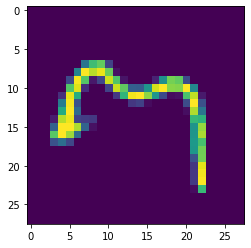

In [ ]:
print(df_train_y[100])
plt.imshow(df_train_x[100].reshape(28, 28))

## **Visualizing more than one digit**

the number of training examples = 48000
the number of classes = 10
Dimension of images = 28 x 28  
The number of occurences of each class in the dataset = {0: 4766, 1: 4812, 2: 4812, 3: 4767, 4: 4786, 5: 4816, 6: 4823, 7: 4839, 8: 4763, 9: 4816}  



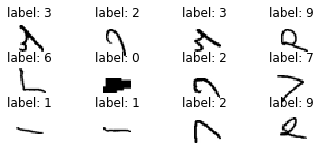

In [ ]:
import matplotlib.pyplot as plt
print("the number of training examples = %i" % df_train_x.shape[0])
print("the number of classes = %i" % len(np.unique(df_train_y)))
print("Dimension of images = {:d} x {:d}  ".format(df_train_x[1].shape[0],df_train_x[1].shape[1])  )

#This line will allow us to know the number of occurrences of each specific class in the data
unique, count= np.unique(df_train_y, return_counts=True)
print("The number of occurences of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )
 
images_and_labels = list(zip(df_train_x,  df_train_y))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label )


    

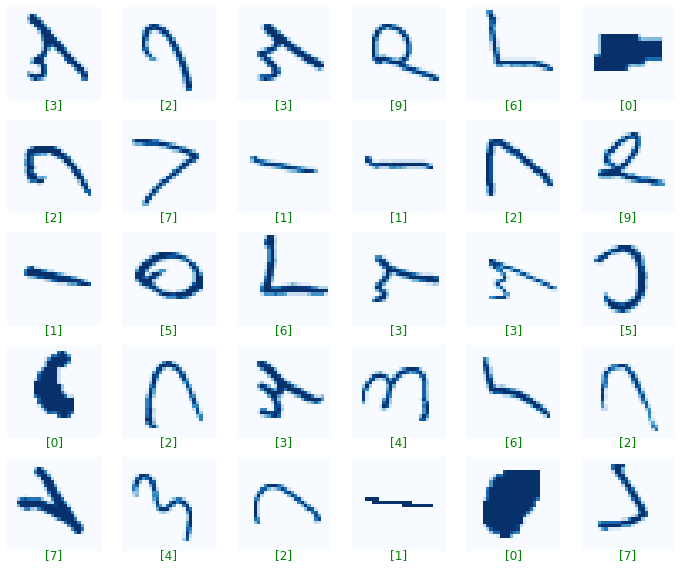

In [ ]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(df_train_x[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(df_train_y[i]), y=-0.15,color="green")
plt.savefig("digits.png")

# **Modelling**

## **Data Preparation for Modeling**

In [ ]:
X_train=pd.read_csv("csvTrainImages 60k x 784.csv", header=None)
y_train = pd.read_csv("csvTrainLabel 60k x 1.csv", header=None)

X_test=pd.read_csv("csvTestImages 10k x 784.csv", header=None)
y_test = pd.read_csv("csvTestLabel 10k x 1.csv", header=None)

<font color = "green">**Normalization**

> This is done to eliminate effect of the colors and illumination 

In [ ]:
# converting pixel values from 0-255 to range [0,1]
X_train = X_train/255
X_test = X_test/255


<font color = "green"> **Reshaping the data**

In [ ]:
# The current dimension of the X_train variable is 784 pixels and 60000 row. 
# We will reshape the data to be in a square format of 3D array
# Reshape image to (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1, 28,28,1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

<font color = 'green'>**Label Encoding the label column for classification**

In [ ]:
print("The number of occurences of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )


The number of occurences of each class in the dataset = {0: 4766, 1: 4812, 2: 4812, 3: 4767, 4: 4786, 5: 4816, 6: 4823, 7: 4839, 8: 4763, 9: 4816}  



> There are ten classes in the labels, hence categorize to ten categories

In [ ]:
from keras.utils.np_utils import to_categorical 

y_train= to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## **CNN**

<font color = 'green'>**Splitting the data into train and test sets**

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=40)

In [ ]:
# Set the CNN model 
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=.75))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# setting the optimizer and anneler

# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs=10 #reduced from 30
batch_size=50

start = time.time()

#  data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally 
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)



# Fit the model
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

# Predict the values from the validation dataset
y_pred_cnn = model.predict(X_test)

end = time.time()
print("Completion time cost:", end - start, "seconds.")
cnn_time = end-start

Epoch 1/10
960/960 - 376s - loss: 0.2902 - accuracy: 0.9071 - val_loss: 0.0332 - val_accuracy: 0.9907
Epoch 2/10
960/960 - 354s - loss: 0.0964 - accuracy: 0.9726 - val_loss: 0.0560 - val_accuracy: 0.9865
Epoch 3/10
960/960 - 351s - loss: 0.0821 - accuracy: 0.9780 - val_loss: 0.0299 - val_accuracy: 0.9923
Epoch 4/10
960/960 - 353s - loss: 0.0758 - accuracy: 0.9797 - val_loss: 0.0363 - val_accuracy: 0.9903
Epoch 5/10
960/960 - 353s - loss: 0.0753 - accuracy: 0.9809 - val_loss: 0.0451 - val_accuracy: 0.9915
Epoch 6/10
960/960 - 354s - loss: 0.0795 - accuracy: 0.9805 - val_loss: 0.0260 - val_accuracy: 0.9933
Epoch 7/10
960/960 - 354s - loss: 0.0816 - accuracy: 0.9800 - val_loss: 0.0279 - val_accuracy: 0.9940
Epoch 8/10
960/960 - 353s - loss: 0.0855 - accuracy: 0.9806 - val_loss: 0.0333 - val_accuracy: 0.9935
Epoch 9/10
960/960 - 354s - loss: 0.0878 - accuracy: 0.9802 - val_loss: 0.0395 - val_accuracy: 0.9934
Epoch 10/10
960/960 - 349s - loss: 0.0877 - accuracy: 0.9794 - val_loss: 0.0351 - 

In [ ]:
history.history['loss']

[0.29017359018325806,
 0.09644538164138794,
 0.08211784064769745,
 0.07578415423631668,
 0.07528986036777496,
 0.07952490448951721,
 0.08155334740877151,
 0.08553794026374817,
 0.08782567083835602,
 0.08765924721956253]

In [ ]:
history.history['val_loss']

[0.033205222338438034,
 0.056009721010923386,
 0.029854530468583107,
 0.03629167750477791,
 0.04506184905767441,
 0.02603483572602272,
 0.027893008664250374,
 0.03325948491692543,
 0.03952566906809807,
 0.0350925512611866]

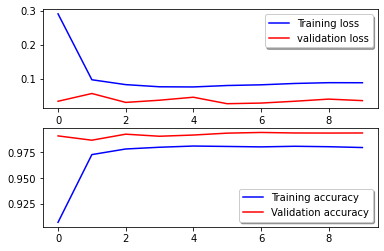

In [ ]:
# evaluating the model using loss and accuracy curves

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



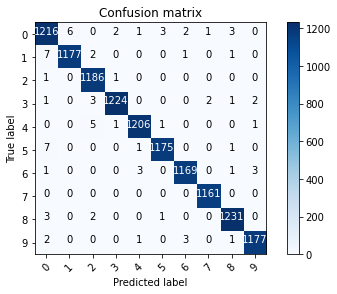

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(y_pred_cnn,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

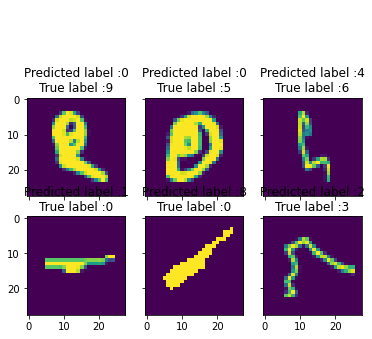

In [ ]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = y_pred_cnn[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("\n\n\n\nPredicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
# Evaluate model
score = model.evaluate(X_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))
#print('Loss accuracy: %2f%%' % round((score[0] * 100),0))
#print(model.metrics_names)

Test accuarcy: 99.350000%


## **K-Nearest Neighbors (KNN)**

In [ ]:
X_train = pd.read_csv("csvTrainImages 60k x 784.csv", header=None)
y_train = pd.read_csv("csvTrainLabel 60k x 1.csv", header=None)

X_train = X_train/255
X_test = X_test/255


# X_train = X_train.values.reshape(28,28)
# X_test = X_test.values.reshape(28, 28)

y_train= to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=40)

In [ ]:

knn = KNeighborsClassifier()

k_range = range(1, 8)
scores = []
for k in k_range:
    print('k = ', k, 'begin...')
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit train set into the model
    knn.fit(X_train, y_train)
    # make predictions using the trained model
    y_pred_knn = knn.predict(X_test)
    # get the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_knn)
    scores.append(accuracy)
    end = time.time()
    print("Completion time cost:", end - start, "seconds.")

k =  1 begin...
Completion time cost: 961.979510307312 seconds.
k =  2 begin...
Completion time cost: 1005.5082786083221 seconds.
k =  3 begin...
Completion time cost: 1003.0293073654175 seconds.
k =  4 begin...
Completion time cost: 1001.894697189331 seconds.
k =  5 begin...
Completion time cost: 1002.9755709171295 seconds.
k =  6 begin...
Completion time cost: 1002.8074395656586 seconds.
k =  7 begin...
Completion time cost: 1005.1783499717712 seconds.


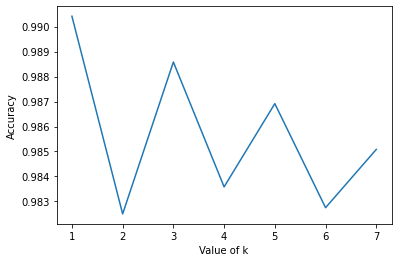

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.show()

The best value of k is 3, after 3 neighbors, the accuracy continues to decrease over time

In [ ]:
# set k = 3


knn = KNeighborsClassifier(n_neighbors = 3)

start = time.time()

# fit the model
knn.fit(X_train, y_train)
# make predictions
y_pred_knn = knn.predict(X_test)

# accuracy of the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(knn_accuracy)

end = time.time()
print("Completion time cost:", end - start, "seconds.")
knn_time = end-start

0.9885833333333334
Completion time cost: 977.8349850177765 seconds.


In [ ]:
# summarize the fit of the model
print(classification_report(y_test, y_pred_knn))
# print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1234
           1       0.98      1.00      0.99      1188
           2       0.98      1.00      0.99      1188
           3       0.99      0.99      0.99      1233
           4       1.00      0.99      0.99      1214
           5       0.99      0.99      0.99      1184
           6       0.98      1.00      0.99      1177
           7       0.99      1.00      0.99      1161
           8       0.99      0.99      0.99      1237
           9       0.99      0.98      0.98      1184

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000
 samples avg       0.99      0.99      0.99     12000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


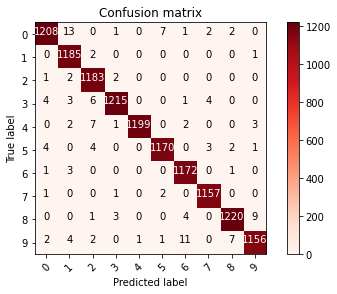

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(y_pred_knn,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

## **XgBoost**

In [ ]:
X_train=pd.read_csv("csvTrainImages 60k x 784.csv", header=None)
y_train = pd.read_csv("csvTrainLabel 60k x 1.csv", header=None)

X_test=pd.read_csv("csvTestImages 10k x 784.csv", header=None)
y_test = pd.read_csv("csvTestLabel 10k x 1.csv", header=None)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the datasets
X_train /= 255.
X_test /= 255.

# y_train= to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes = 10)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
    
# initialize model
model_xgb = xgb.XGBClassifier()

# start timing
start = time.time()

# cross-validation
cv_results = cross_val_score(model_xgb, X_train, y_train, 
                   cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)    

# fit model into the data
model_xgb.fit(X_train, y_train, verbose=True)
    
print("cv_results.................")
print(cv_results)    

print("model..................") 
print(model_xgb)

# make predictions
y_pred_xgb = model_xgb.predict(X_test)

# accuracy of the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(xgb_accuracy)

end = time.time()
print("Completion time cost:", end - start, "seconds.")
xgb_time = end-start

60000 train samples
10000 test samples


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.7s finished


ValueError: ignored

In [ ]:
print(classification_report(y_pred_xgb, y_test))
print(confusion_matrix(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       999
           1       0.97      0.97      0.97      1002
           2       0.96      0.95      0.95      1007
           3       0.95      0.97      0.96       980
           4       0.94      0.96      0.95       981
           5       0.97      0.97      0.97      1004
           6       0.98      0.98      0.98      1007
           7       0.99      0.98      0.99      1002
           8       0.96      0.98      0.97       982
           9       0.97      0.94      0.96      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[973   9   1   1   4   7   1   1   2   0]
 [  5 974   2   2  11   0   5   0   0   3]
 [  0   0 957  25  13   7   0   0   2   3]
 [  5   1  11 950   4   0   1   1   3   4]
 [  0   6  12   2 944   4   2   2   5   4]
 [  8   0   5   2   3 972 